In [ ]:
file_path = r"/content/FL_APR_2022 (TMAS).VOL"

with open(file_path, "rb") as f:
    data = f.read(100)  # Read the first 100 bytes
    print(data)


b'record_type|state_code|f_system|station_id|travel_dir|travel_lane|year_record|month_record|day_recor'


In [ ]:
with open(file_path, "r", encoding="utf-8", errors="ignore") as f:
    for _ in range(10):  # Print first 10 lines
        print(f.readline().strip())


record_type|state_code|f_system|station_id|travel_dir|travel_lane|year_record|month_record|day_record|day_of_week|hour_00|hour_01|hour_02|hour_03|hour_04|hour_05|hour_06|hour_07|hour_08|hour_09|hour_10|hour_11|hour_12|hour_13|hour_14|hour_15|hour_16|hour_17|hour_18|hour_19|hour_20|hour_21|hour_22|hour_23|restrictions
V|12|4U|010228|3|1|2022|4|1|6|31|17|19|44|77|169|333|454|485|548|614|694|708|656|658|665|701|674|498|336|248|206|147|94|
V|12|4U|010228|3|1|2022|4|2|7|51|39|19|28|45|100|149|290|379|518|593|654|654|596|599|619|598|532|421|299|224|182|123|93|
V|12|4U|010228|3|1|2022|4|3|1|36|28|17|25|25|63|129|176|304|416|496|542|597|578|494|462|479|434|305|257|210|133|106|50|
V|12|4U|010228|3|1|2022|4|4|2|14|23|19|36|79|195|338|522|575|503|597|646|691|616|644|668|697|634|409|298|225|126|102|59|
V|12|4U|010228|3|1|2022|4|5|3|31|19|25|38|63|153|347|567|571|546|626|649|612|685|685|749|740|663|432|323|255|145|118|53|
V|12|4U|010228|3|1|2022|4|6|4|20|14|22|44|71|172|350|588|560|566|647|612|706|

In [ ]:
import zipfile
import tarfile

if zipfile.is_zipfile(file_path):
    with zipfile.ZipFile(file_path, "r") as z:
        z.extractall("output_folder")
        print("Extracted ZIP contents.")
elif tarfile.is_tarfile(file_path):
    with tarfile.open(file_path, "r") as tar:
        tar.extractall("output_folder")
        print("Extracted TAR contents.")


In [ ]:
!wget -P data https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/classic_rock.db

--2025-01-26 15:34:03--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/classic_rock.db
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5652480 (5.4M) [binary/octet-stream]
Saving to: ‘data/classic_rock.db’

classic_rock.db     100%[===================>]   5.39M  34.9MB/s    in 0.2s    

2025-01-26 15:34:03 (34.9 MB/s) - ‘data/classic_rock.db’ saved [5652480/5652480]



In [ ]:
import struct

with open(file_path, "rb") as f:
    header = f.read(8)  # Read first 8 bytes
    print("Header:", header)

    # Example: If it contains integers (modify format as needed)
    f.seek(0)  # Go back to the start
    data = struct.unpack("4sI", f.read(8))  # Example: 4-byte string + Integer
    print(data)


Header: b'record_t'
(b'reco', 1952408690)


In [ ]:
import sqlite3 as sq3
import pandas as pd

path = 'data/classic_rock.db'
con = sq3.Connection(path)

query = ''' SELECT * FROM ROCK_SONGS WHERE PlayCount > 30;   '''

data = pd.read_sql(query, con)

data.head()

,Song,Artist,Release_Year,PlayCount
0,Caught Up in You,.38 Special,1982.0,82
1,Hold On Loosely,.38 Special,1981.0,85
2,Back In Black,AC/DC,1980.0,97
3,Dirty Deeds Done Dirt Cheap,AC/DC,1976.0,85
4,For Those About To Rock,AC/DC,1981.0,46


In [ ]:
pip install pymongo


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 20.0 MB/s eta 0:00:00


In [ ]:
from pymongo import MongoClient

con = MongoClient()
db = con.database_name
cursor = db.collection_name.find()

df = pd.DataFrame(list(cursor))
df.head()

ServerSelectionTimeoutError: localhost:27017: [Errno 111] Connection refused (configured timeouts: socketTimeoutMS: 20000.0ms, connectTimeoutMS: 20000.0ms), Timeout: 30s, Topology Description: <TopologyDescription id: 679653dc334213c7048152b9, topology_type: Unknown, servers: [<ServerDescription ('localhost', 27017) server_type: Unknown, rtt: None, error=AutoReconnect('localhost:27017: [Errno 111] Connection refused (configured timeouts: socketTimeoutMS: 20000.0ms, connectTimeoutMS: 20000.0ms)')>]>

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv("/content/american_bankruptcy.csv")
data = data.drop(columns=["company_name"])
data.head()

,status_label,year,current_asset,cost_goods_sold,depreciation_amortization,earnings_before_interest_task,inventory,net_income,total_receivables,market_value,net_sales,total_assets,total_long_term_dept,EBIT,grosse_profit,total_carrunt_liabilities,retained_earnings,total_revenue,total_liabilities,total_operating
0,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,372.7519,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,377.1180,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,364.5928,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,143.3295,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,308.9071,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


In [ ]:
# to delete the feature we don't need it (feature engineering)

data = data.drop(columns=["total_operating"])
data = data.drop(columns=["total_liabilities"])
data = data.drop(columns=["total_revenue"])
data = data.drop(columns=["total_assets"])
data = data.drop(columns=["EBIT"])
data = data.drop(columns=["net_sales"])
data = data.drop(columns=["earnings_before_interest_task"])
data = data.drop(columns=["cost_goods_sold"])
data = data.drop(columns=["current_asset"])
data = data.drop(columns=["total_carrunt_liabilities"])
data = data.drop(columns=["grosse_profit"])
data = data.drop(columns=["market_value"])

#data = data.drop(columns=["year"])
#data = data.drop(columns=["inventory"])
#data = data.drop(columns=["total_receivables"])
#data = data.drop(columns=["total_carrunt_liabilities"])
#data = data.drop(columns=["EBIT"])


In [ ]:
data.shape

(78682, 8)

In [ ]:
data.describe()

,year,current_asset,depreciation_amortization,inventory,net_income,total_receivables,market_value,total_long_term_dept,grosse_profit,total_carrunt_liabilities,retained_earnings
count,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,7.868200e+04,78682.000000,78682.000000,78682.000000,78682.000000
mean,2007.506317,880.362485,121.234256,201.605717,129.382453,286.832743,3.414355e+03,722.483710,769.490783,610.072255,532.467069
std,5.742768,3928.564794,652.376804,1060.766096,1265.532022,1335.978571,1.841410e+04,3242.170946,3774.703114,2938.387443,6369.159440
min,1999.000000,-7.760000,0.000000,0.000000,-98696.000000,-0.006000,1.000000e-04,-0.023000,-21536.000000,0.001000,-102362.000000
25%,2002.000000,18.924000,1.192000,0.000000,-7.415750,3.281250,3.498000e+01,0.000000,8.521250,8.889250,-68.282750
50%,2007.000000,100.449500,7.929500,7.023000,1.616000,22.820000,2.275118e+02,7.593500,63.581500,43.333000,-1.131000
75%,2012.000000,431.526750,47.971750,74.747250,40.144250,131.580500,1.244890e+03,248.760750,344.074250,222.817000,146.070000
max,2018.000000,169662.000000,28430.000000,62567.000000,104821.000000,65812.000000,1.073391e+06,166250.000000,137106.000000,116866.000000,402089.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status_label               78682 non-null  int64  
 1   year                       78682 non-null  int64  
 2   current_asset              78682 non-null  float64
 3   depreciation_amortization  78682 non-null  float64
 4   inventory                  78682 non-null  float64
 5   net_income                 78682 non-null  float64
 6   total_receivables          78682 non-null  float64
 7   market_value               78682 non-null  float64
 8   total_long_term_dept       78682 non-null  float64
 9   grosse_profit              78682 non-null  float64
 10  total_carrunt_liabilities  78682 non-null  float64
 11  retained_earnings          78682 non-null  float64
dtypes: float64(10), int64(2)
memory usage: 7.2 MB


In [ ]:
## encoding the class

from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the column
data['status_label'] = label_encoder.fit_transform(data['status_label'])

In [ ]:
## to count the number of each class

class_counts = data['status_label'].value_counts().sort_index()

# Print the count of each class value
print("Count of each class value:")
print(class_counts)

Count of each class value:
status_label
0    73462
1     5220
Name: count, dtype: int64


In [ ]:
## to subtract by 1999 in column year

data['year'] = data['year'].apply(lambda x: x - 1999)

In [ ]:
## split the data to x_train , x_test , y_train , y_test

from sklearn.model_selection import train_test_split

y= data["status_label"]
x= data.drop(columns=["status_label"])


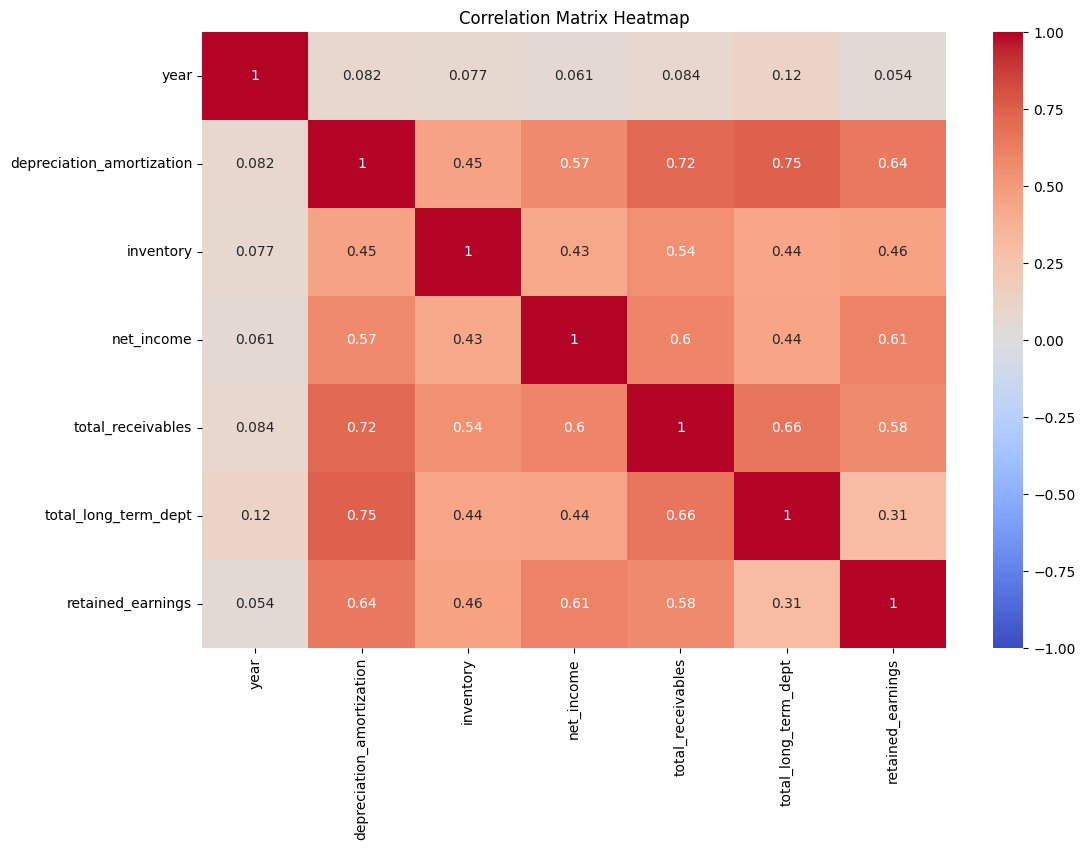

In [ ]:
## correlation

import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = x.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

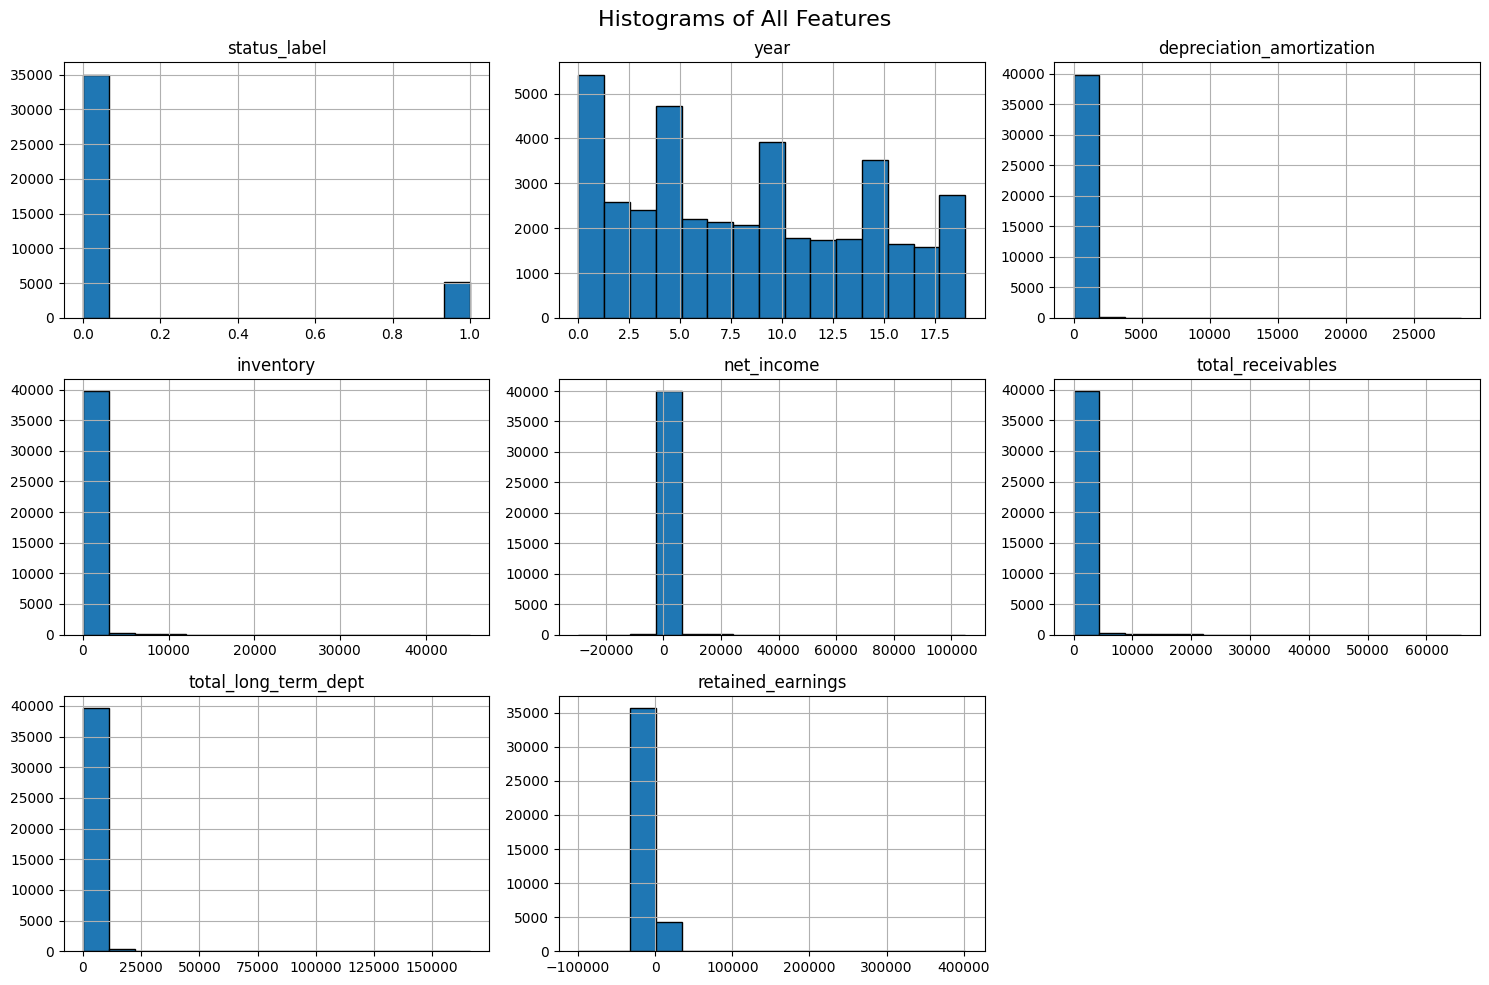

In [ ]:
## histogram

data.hist(bins=15, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of All Features', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
## scale the data

from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the feature data
X_scaled = scaler.fit_transform(x)

# Convert the scaled data back to a DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=x.columns)

x_train, x_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2)

In [ ]:
x_train

,year,current_asset,cost_goods_sold,depreciation_amortization,earnings_before_interest_task,inventory,net_income,total_receivables,market_value,net_sales,total_assets,total_long_term_dept,EBIT,grosse_profit,total_carrunt_liabilities,retained_earnings,total_revenue,total_liabilities,total_operating
76233,1.479032,-0.223175,-0.178315,-0.184749,-0.189641,-0.190058,-0.109754,-0.213768,-0.183742,-0.197120,-0.221550,-0.222730,-0.174648,-0.202177,-0.206717,-0.095315,-0.197120,-0.219844,-0.189454
43865,1.653165,0.003494,-0.149868,-0.072404,-0.069270,-0.016039,-0.060822,-0.028450,0.110693,-0.089928,-0.100688,-0.222841,-0.061646,0.069875,-0.115989,-0.037012,-0.089928,-0.165782,-0.089760
67302,0.956632,-0.220337,-0.177206,-0.185462,-0.193149,-0.190058,-0.111836,-0.214687,-0.182929,-0.197814,-0.220506,-0.222177,-0.179059,-0.206998,-0.206857,-0.097164,-0.197814,-0.219513,-0.189572
42826,-1.481232,-0.197858,-0.166811,-0.152623,-0.197278,-0.190058,-0.173250,-0.190070,-0.184165,-0.187004,-0.203666,-0.165308,-0.198950,-0.197369,-0.181530,-0.145130,-0.187004,-0.186564,-0.176377
54090,1.653165,0.032630,-0.148941,-0.123028,-0.169891,0.084356,-0.181760,-0.071262,-0.086641,-0.159711,-0.113587,-0.222841,-0.175001,-0.153243,-0.173621,0.116427,-0.159711,-0.207139,-0.150364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77083,0.956632,-0.213098,-0.173404,-0.171806,-0.186448,-0.184591,-0.144855,-0.196382,-0.185114,-0.186773,-0.216784,-0.199550,-0.175998,-0.181041,-0.190053,-0.135471,-0.186773,-0.203615,-0.178204
9251,-1.481232,-0.134899,-0.132859,-0.066528,-0.062857,-0.153348,-0.025651,-0.105609,-0.130655,-0.142735,-0.017814,0.030558,-0.055577,-0.137548,-0.089722,-0.036244,-0.142735,0.000577,-0.151563
15639,-0.958832,-0.220304,-0.176840,-0.185151,-0.186995,-0.187210,-0.102143,-0.212683,-0.184966,-0.196108,-0.220603,-0.222791,-0.170910,-0.202461,-0.206696,-0.083393,-0.196108,-0.219824,-0.188804
12721,-0.958832,-0.207359,-0.178284,-0.182697,-0.204756,-0.188381,-0.130734,-0.212422,-0.175485,-0.195466,-0.215696,-0.216891,-0.195891,-0.197013,-0.202265,-0.108635,-0.195466,-0.214735,-0.184638


In [ ]:
## use RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score


model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Train the model
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)
y_proba = model.predict_proba(x_test)[:, 1]  # For ROC curve, use probability scores

# Evaluate the model

# Confusion Matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Calculate Precision, Recall, and F1-Score
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print Precision, Recall, F1-Score
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Cross-Validation Accuracy
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
print(f"\nCross-Validation Accuracy: {np.mean(cv_scores):.2f}")

Confusion Matrix:
[[14705     2]
 [  976    54]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     14707
           1       0.96      0.05      0.10      1030

    accuracy                           0.94     15737
   macro avg       0.95      0.53      0.53     15737
weighted avg       0.94      0.94      0.91     15737

Precision: 0.96
Recall: 0.05
F1-Score: 0.10

Cross-Validation Accuracy: 0.93


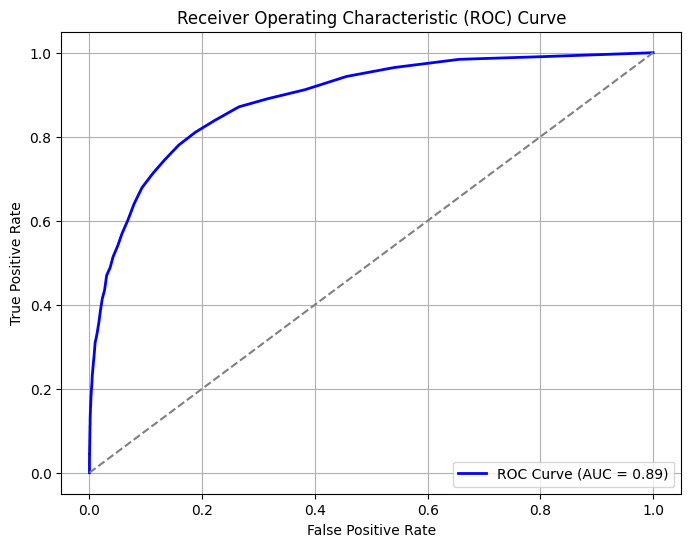

In [ ]:
## to show the ROC curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_proba, pos_label=model.classes_[1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv("/content/american_bankruptcy.csv")
data= data.drop(columns=["company_name"])
data.head()

## encoding the class

from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the column
data['status_label'] = label_encoder.fit_transform(data['status_label'])

## to subtract by 1999 in column year

data['year'] = data['year'].apply(lambda x: x - 1999)

In [ ]:
## reduce size of class alive to be only 10000 and class failed already have 5220

data_alive = data[data['status_label'] == 0].sample(n=35000, random_state=42)
data_failed = data[data['status_label'] == 1]

# Concatenate the two dataframes
data = pd.concat([data_alive, data_failed])

data.head()


,status_label,year,current_asset,cost_goods_sold,depreciation_amortization,earnings_before_interest_task,inventory,net_income,total_receivables,market_value,net_sales,total_assets,total_long_term_dept,EBIT,grosse_profit,total_carrunt_liabilities,retained_earnings,total_revenue,total_liabilities,total_operating
33494,0,0,16.952,38.518,0.566,8.067,9.895,4.478,3.751,43.1681,72.303,28.709,0.903,7.501,33.785,7.955,7.236,72.303,10.083,64.236
53927,0,9,254.591,553.021,26.399,63.114,54.800,-97.527,96.535,112.4724,752.698,382.437,183.000,36.715,199.677,94.204,-66.152,752.698,290.679,689.584
59602,0,4,5.729,1.979,2.503,1.254,0.000,-2.167,1.430,28.3766,14.319,19.145,0.000,-1.249,12.340,5.027,-44.144,14.319,5.130,13.065
56036,0,0,0.343,0.314,0.152,0.294,0.000,0.065,0.220,5.0520,0.918,2.550,0.560,0.142,0.604,0.571,0.163,0.918,1.147,0.624
13527,0,9,347.365,255.642,18.900,25.694,98.833,-140.939,81.868,244.4122,445.336,519.171,151.527,6.794,189.694,89.810,-134.082,445.336,268.583,419.642


In [ ]:
data.shape


(25220, 20)

In [ ]:
## split the data to x_train , x_test , y_train , y_test

from sklearn.model_selection import train_test_split

y= data["status_label"]
x= data.drop(columns=["status_label"])

## scale the data

from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the feature data
X_scaled = scaler.fit_transform(x)

# Convert the scaled data back to a DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=x.columns)

x_train, x_test, y_train, y_test = train_test_split(X_scaled,y)

In [ ]:
## to count the number of each class

class_counts = data['status_label'].value_counts().sort_index()

# Print the count of each class value
print("Count of each class value:")
print(class_counts)

Count of each class value:
status_label
0    30000
1     5220
Name: count, dtype: int64


In [ ]:
## use RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.utils.class_weight import compute_class_weight


from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=400,
    max_depth=12,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=10,  # Adjust this based on the imbalance ratio
    random_state=42,
    n_jobs=-1
)

# Train the model
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)
y_proba = model.predict_proba(x_test)[:, 1]  # For ROC curve, use probability scores

# Evaluate the model

# Confusion Matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Calculate Precision, Recall, and F1-Score
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print Precision, Recall, F1-Score
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Cross-Validation Accuracy
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
print(f"\nCross-Validation Accuracy: {np.mean(cv_scores):.2f}")

Confusion Matrix:
[[7378   71]
 [1009  347]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      7449
           1       0.83      0.26      0.39      1356

    accuracy                           0.88      8805
   macro avg       0.85      0.62      0.66      8805
weighted avg       0.87      0.88      0.85      8805

Precision: 0.83
Recall: 0.26
F1-Score: 0.39


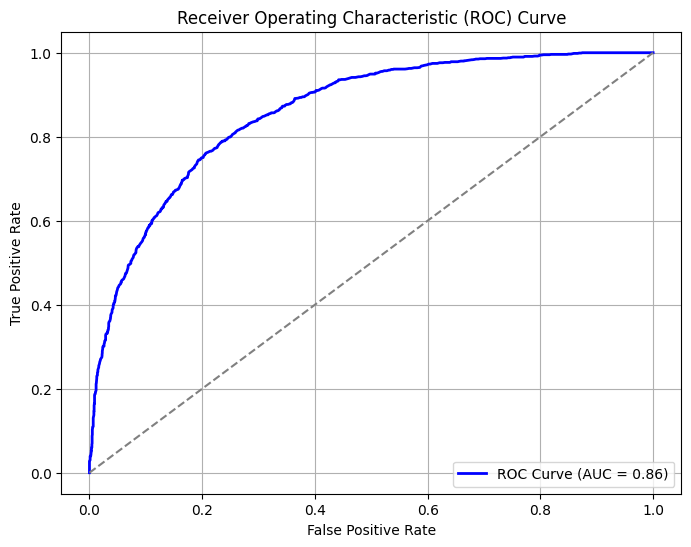

In [ ]:
## to show the ROC curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_proba, pos_label=model.classes_[1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("/content/american_bankruptcy.csv")
data= data.drop(columns=["company_name"])
data.head()

## encoding the class

from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the column
data['status_label'] = label_encoder.fit_transform(data['status_label'])

## to subtract by 1999 in column year

data['year'] = data['year'].apply(lambda x: x - 1999)

In [2]:
## reduce size of class alive to be only 10000 and class failed already have 5220

data_alive = data[data['status_label'] == 0].sample(n=35000, random_state=42)
data_failed = data[data['status_label'] == 1]

# Concatenate the two dataframes
data = pd.concat([data_alive, data_failed])

data.head()


,status_label,year,current_asset,cost_goods_sold,depreciation_amortization,earnings_before_interest_task,inventory,net_income,total_receivables,market_value,net_sales,total_assets,total_long_term_dept,EBIT,grosse_profit,total_carrunt_liabilities,retained_earnings,total_revenue,total_liabilities,total_operating
33494,0,0,16.952,38.518,0.566,8.067,9.895,4.478,3.751,43.1681,72.303,28.709,0.903,7.501,33.785,7.955,7.236,72.303,10.083,64.236
53927,0,9,254.591,553.021,26.399,63.114,54.800,-97.527,96.535,112.4724,752.698,382.437,183.000,36.715,199.677,94.204,-66.152,752.698,290.679,689.584
59602,0,4,5.729,1.979,2.503,1.254,0.000,-2.167,1.430,28.3766,14.319,19.145,0.000,-1.249,12.340,5.027,-44.144,14.319,5.130,13.065
56036,0,0,0.343,0.314,0.152,0.294,0.000,0.065,0.220,5.0520,0.918,2.550,0.560,0.142,0.604,0.571,0.163,0.918,1.147,0.624
13527,0,9,347.365,255.642,18.900,25.694,98.833,-140.939,81.868,244.4122,445.336,519.171,151.527,6.794,189.694,89.810,-134.082,445.336,268.583,419.642


In [ ]:
data.shape

(40220, 20)

In [3]:
## split the data to x_train , x_test , y_train , y_test

from sklearn.model_selection import train_test_split

y= data["status_label"]
x= data.drop(columns=["status_label"])

## scale the data

from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the feature data
X_scaled = scaler.fit_transform(x)

# Convert the scaled data back to a DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=x.columns)

x_train, x_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.3)

In [4]:
## to count the number of each class

class_counts = data['status_label'].value_counts().sort_index()

# Print the count of each class value
print("Count of each class value:")
print(class_counts)

Count of each class value:
status_label
0    35000
1     5220
Name: count, dtype: int64


In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

classifiers = [
    KNeighborsClassifier(n_neighbors=15),
    GaussianNB(),
    DecisionTreeClassifier(random_state=42),

    RandomForestClassifier(n_estimators=250,
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=4,
    max_features='log2',
    bootstrap=False,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1),

    BernoulliNB(),

    LogisticRegression(
    penalty='l2',
    C=1.0,
    class_weight='balanced',
    solver='lbfgs',
    random_state=42
),

    SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    class_weight='balanced',
    probability=True,
    random_state=42
)
]

Confusion Matrix for KNeighborsClassifier:
[[10506    67]
 [ 1424    69]]
Precision, Recall, F-score, Support for KNeighborsClassifier:
Precision: 0.69
Recall: 0.52
F-score: 0.51
Support: None
Mean Accuracy Score for KNeighborsClassifier: 0.87


Confusion Matrix for GaussianNB:
[[ 905 9668]
 [  89 1404]]
Precision, Recall, F-score, Support for GaussianNB:
Precision: 0.52
Recall: 0.51
F-score: 0.19
Support: None
Mean Accuracy Score for GaussianNB: 0.20


Confusion Matrix for DecisionTreeClassifier:
[[9478 1095]
 [ 928  565]]
Precision, Recall, F-score, Support for DecisionTreeClassifier:
Precision: 0.63
Recall: 0.64
F-score: 0.63
Support: None
Mean Accuracy Score for DecisionTreeClassifier: 0.81


Confusion Matrix for RandomForestClassifier:
[[10182   391]
 [  878   615]]
Precision, Recall, F-score, Support for RandomForestClassifier:
Precision: 0.77
Recall: 0.69
F-score: 0.72
Support: None
Mean Accuracy Score for RandomForestClassifier: 0.86


Confusion Matrix for BernoulliNB:
[[10573 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Confusion Matrix for LogisticRegression:
[[5781 4792]
 [ 471 1022]]
Precision, Recall, F-score, Support for LogisticRegression:
Precision: 0.55
Recall: 0.62
F-score: 0.48
Support: None


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Mean Accuracy Score for LogisticRegression: 0.75


Confusion Matrix for SVC:
[[4582 5991]
 [ 257 1236]]
Precision, Recall, F-score, Support for SVC:
Precision: 0.56
Recall: 0.63
F-score: 0.44
Support: None
Mean Accuracy Score for SVC: 0.32




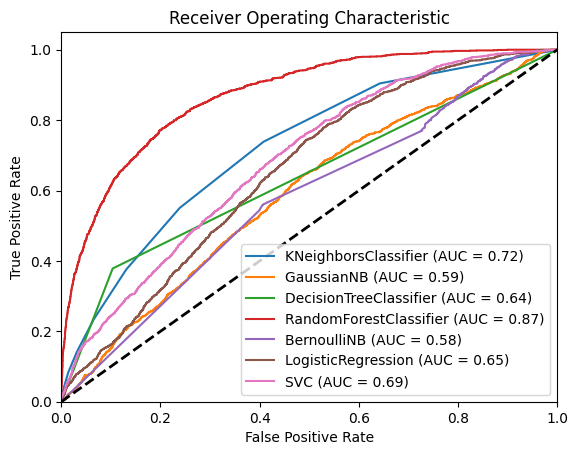



********************************************************************************************




In [6]:
##with all data and cut feature
## first code only algorithm

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, roc_curve, auc, classification_report
import matplotlib.pyplot as plt

# Assuming you have your data and classifiers defined
# data: your input DataFrame
# classifiers: a list of classifiers you want to evaluate


# Loop through each classifier
for clf in classifiers:
    # Train the classifier
    clf.fit(x_train, y_train)

    # Test the classifier and make predictions
    y_pred = clf.predict(x_test)

    # Check if the classifier supports probability estimates
    if hasattr(clf, "predict_proba"):
        proba = clf.predict_proba(x_test)
        if len(proba[0]) == 2:
            proba = proba[:, 1]  # Binary classification
        else:
            proba = proba.max(axis=1)  # Multiclass classification
    else:
        proba = None

    # Compute and print the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {clf.__class__.__name__}:")
    print(cm)

    # Compute and print the precision, recall, fscore, and support
    prf = precision_recall_fscore_support(y_test, y_pred, average='macro')
    print(f"Precision, Recall, F-score, Support for {clf.__class__.__name__}:")
    print(f"Precision: {prf[0]:.2f}")
    print(f"Recall: {prf[1]:.2f}")
    print(f"F-score: {prf[2]:.2f}")
    print(f"Support: {prf[3]}")

    # Compute and plot the ROC curve and AUC (if probabilities are available)
    if proba is not None:
        fpr, tpr, thresholds = roc_curve(y_test, proba, pos_label=y_test.max())
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{clf.__class__.__name__} (AUC = {roc_auc:.2f})")

    # Cross-validation accuracy scores
    cv_scores = cross_val_score(clf, x, y, cv=5, scoring='accuracy')
    mean_accuracy = cv_scores.mean()
    print(f"Mean Accuracy Score for {clf.__class__.__name__}: {mean_accuracy:.2f}\n\n")

# Plot the ROC curve for all classifiers
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print("\n\n********************************************************************************************\n\n")


In [ ]:
##with all data and cut feature
## first code only algorithm

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, roc_curve, auc, classification_report
import matplotlib.pyplot as plt

# Assuming you have your data and classifiers defined
# data: your input DataFrame
# classifiers: a list of classifiers you want to evaluate


# Loop through each classifier
for clf in classifiers:
    # Train the classifier
    clf.fit(x_train, y_train)

    # Test the classifier and make predictions
    y_pred = clf.predict(x_test)

    # Check if the classifier supports probability estimates
    if hasattr(clf, "predict_proba"):
        proba = clf.predict_proba(x_test)
        if len(proba[0]) == 2:
            proba = proba[:, 1]  # Binary classification
        else:
            proba = proba.max(axis=1)  # Multiclass classification
    else:
        proba = None

    # Compute and print the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {clf.__class__.__name__}:")
    print(cm)

    # Compute and print the precision, recall, fscore, and support
    prf = precision_recall_fscore_support(y_test, y_pred, average='macro')
    print(f"Precision, Recall, F-score, Support for {clf.__class__.__name__}:")
    print(f"Precision: {prf[0]:.2f}")
    print(f"Recall: {prf[1]:.2f}")
    print(f"F-score: {prf[2]:.2f}")
    print(f"Support: {prf[3]}")

    # Compute and plot the ROC curve and AUC (if probabilities are available)
    if proba is not None:
        fpr, tpr, thresholds = roc_curve(y_test, proba, pos_label=y_test.max())
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{clf.__class__.__name__} (AUC = {roc_auc:.2f})")

    # Cross-validation accuracy scores
    cv_scores = cross_val_score(clf, x, y, cv=5, scoring='accuracy')
    mean_accuracy = cv_scores.mean()
    print(f"Mean Accuracy Score for {clf.__class__.__name__}: {mean_accuracy:.2f}\n\n")

# Plot the ROC curve for all classifiers
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print("\n\n********************************************************************************************\n\n")


Confusion Matrix for KNeighborsClassifier:
[[10390    48]
 [ 1565    63]]
Precision, Recall, F-score, Support for KNeighborsClassifier:
Precision: 0.72
Recall: 0.52
F-score: 0.50
Support: None
Mean Accuracy Score for KNeighborsClassifier: 0.87


Confusion Matrix for GaussianNB:
[[ 905 9533]
 [  93 1535]]
Precision, Recall, F-score, Support for GaussianNB:
Precision: 0.52
Recall: 0.51
F-score: 0.20
Support: None
Mean Accuracy Score for GaussianNB: 0.20


Confusion Matrix for DecisionTreeClassifier:
[[9343 1095]
 [1012  616]]
Precision, Recall, F-score, Support for DecisionTreeClassifier:
Precision: 0.63
Recall: 0.64
F-score: 0.63
Support: None
Mean Accuracy Score for DecisionTreeClassifier: 0.81


Confusion Matrix for RandomForestClassifier:
[[9990  448]
 [1005  623]]
Precision, Recall, F-score, Support for RandomForestClassifier:
Precision: 0.75
Recall: 0.67
F-score: 0.70
Support: None
Mean Accuracy Score for RandomForestClassifier: 0.85


Confusion Matrix for LogisticRegression:
[[566

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Mean Accuracy Score for LogisticRegression: 0.83


Confusion Matrix for SVC:
[[4716 5722]
 [ 308 1320]]
Precision, Recall, F-score, Support for SVC:
Precision: 0.56
Recall: 0.63
F-score: 0.46
Support: None


In [ ]:
# Import libraries
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, recall_score, f1_score, accuracy_score, confusion_matrix
import numpy as np

# Initialize Logistic Regression model
log_reg = LogisticRegression()

# Define scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score, average='binary'),  # Change to 'micro' or 'macro' for multiclass
    'f1': make_scorer(f1_score, average='binary')
}

# Perform cross-validation with multiple metrics
cv_results = cross_validate(log_reg, x, y, cv=5, scoring=scoring, return_train_score=False, return_estimator=True)

# Display cross-validation results
print("Cross-Validation Results:")
print("Accuracy Scores:", cv_results['test_accuracy'])
print("Recall Scores:", cv_results['test_recall'])
print("F1 Scores:", cv_results['test_f1'])
print("\nMean Metrics:")
print("Mean Accuracy:", cv_results['test_accuracy'].mean())
print("Mean Recall:", cv_results['test_recall'].mean())
print("Mean F1:", cv_results['test_f1'].mean())

# Confusion Matrix for each fold
for idx, model in enumerate(cv_results['estimator']):
    y_pred = model.predict(x)
    cm = confusion_matrix(y, y_pred)
    print(f"\nConfusion Matrix for Fold {idx+1}:")
    print(cm)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-Validation Results:
Accuracy Scores: [0.87033814 0.86934361 0.86909498 0.86996519 0.86897066]
Recall Scores: [0.00574713 0.00095785 0.         0.00766284 0.        ]
F1 Scores: [0.01137441 0.00189934 0.         0.01506591 0.        ]

Mean Metrics:
Mean Accuracy: 0.8695425161611139
Mean Recall: 0.0028735632183908046
Mean F1: 0.005667931237321014

Confusion Matrix for Fold 1:
[[34974    26]
 [ 5205    15]]

Confusion Matrix for Fold 2:
[[34950    50]
 [ 5196    24]]

Confusion Matrix for Fold 3:
[[34940    60]
 [ 5192    28]]

Confusion Matrix for Fold 4:
[[34960    40]
 [ 5200    20]]

Confusion Matrix for Fold 5:
[[34963    37]
 [ 5196    24]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
